In [1]:
%load_ext autoreload
%load_ext autotime

time: 414 µs (started: 2023-07-29 14:18:32 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

time: 1.07 s (started: 2023-07-29 14:18:32 -07:00)


In [3]:
import dask.dataframe as dd
import numpy as np
import pandas as pd


time: 538 ms (started: 2023-07-29 14:18:33 -07:00)


In [4]:
%autoreload 2

from wisio.recorder import RecorderAnalyzer

log_dir = "/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet"

recorder_analyzer = RecorderAnalyzer(
    cluster_manager_args=dict(
        force_local=True,
        cluster_settings=dict(
            cores=4,
            dashboard_port=3646,
            local_directory="/var/tmp/dask-recorder",
            log_file="%J.log",
            worker_queue="pdebug"
        )
    ),
    working_dir='.recorder',
    debug=True
) 

recorder_analyzer

distributed.diskutils - INFO - Found stale lock file and directory '/var/tmp/dask-recorder/cluster-0-local/dask-worker-space/worker-mimu9_v3', purging
distributed.diskutils - INFO - Found stale lock file and directory '/var/tmp/dask-recorder/cluster-0-local/dask-worker-space/worker-szoc99wx', purging
distributed.diskutils - INFO - Found stale lock file and directory '/var/tmp/dask-recorder/cluster-0-local/dask-worker-space/worker-ejspd45x', purging
distributed.diskutils - INFO - Found stale lock file and directory '/var/tmp/dask-recorder/cluster-0-local/dask-worker-space/worker-mze0j2oi', purging


time: 2.52 s (started: 2023-07-29 14:18:34 -07:00)


In [5]:
recorder_analyzer.cluster_manager.clients[0]

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:3646/status,
Dashboard: http://127.0.0.1:3646/status,Workers: 4
Total threads: 36,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40263,Workers: 4
Dashboard: http://127.0.0.1:3646/status,Total threads: 36
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:44249,Total threads: 9
Dashboard: http://127.0.0.1:36515/status,Memory: 0 B
Nanny: tcp://127.0.0.1:41099,


time: 41.9 ms (started: 2023-07-29 14:18:36 -07:00)


In [6]:
%autoreload 2

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, metrics=['duration', 'bw', 'iops'])

time: 20.5 s (started: 2023-07-29 14:18:36 -07:00)


(<Figure size 500x500 with 1 Axes>, <Axes: >)

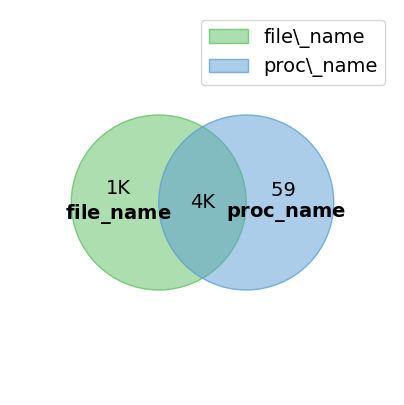

time: 784 ms (started: 2023-07-29 14:18:57 -07:00)


In [7]:
res.plot.view_relations2('duration', ('file_name',), ('proc_name',))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

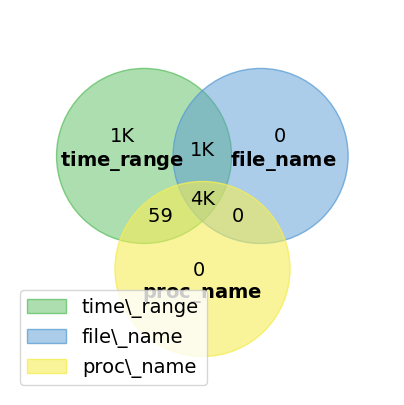

time: 657 ms (started: 2023-07-29 14:18:58 -07:00)


In [8]:
res.plot.view_relations3('duration', ('time_range',), ('file_name',), ('proc_name',))

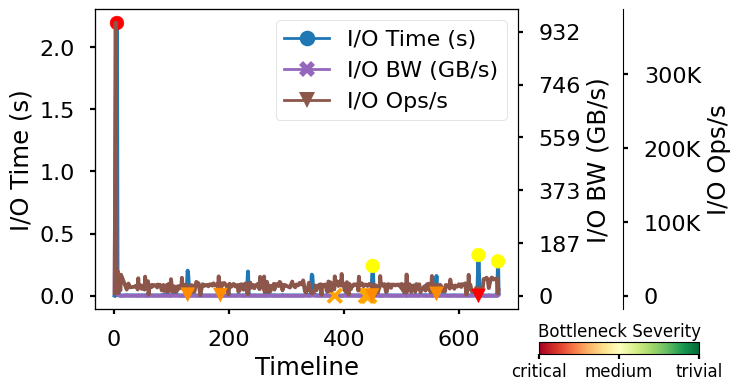

time: 1.79 s (started: 2023-07-29 16:36:58 -07:00)


In [94]:
fig = res.plot.bottleneck_timeline3(
    metric1='duration', 
    metric2='bw', 
    metric3='iops', 
    label1='I/O Time (s)',
    label2='I/O BW (GB/s)',
    label3='I/O Ops/s',
    figsize=(8, 4),
    threshold=0.1,
    sample_count=5,    
)

In [17]:
fig.savefig('bot.pdf', bbox_inches='tight')

time: 539 ms (started: 2023-07-29 14:22:53 -07:00)


<Axes: title={'center': 'duration'}, xlabel='time_range', ylabel='duration_sum'>

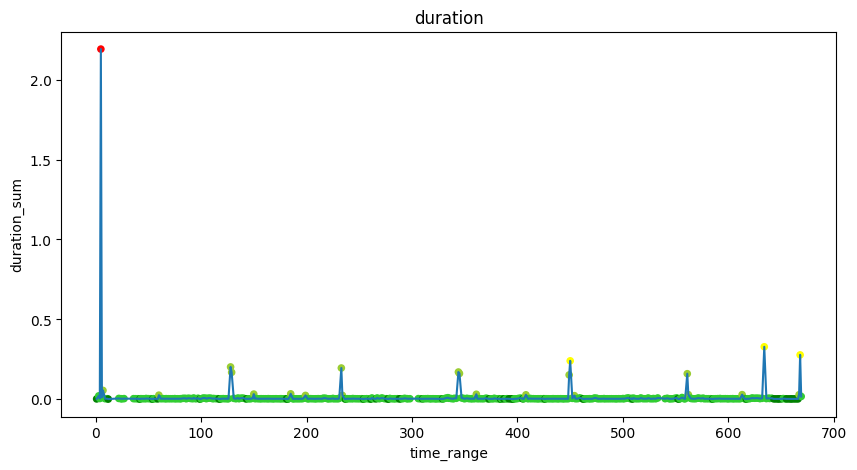

time: 715 ms (started: 2023-07-29 10:12:10 -07:00)


In [31]:
res.plot.bottleneck_timeline('duration')

<Axes: title={'center': 'bw'}, xlabel='time_range', ylabel='bw'>

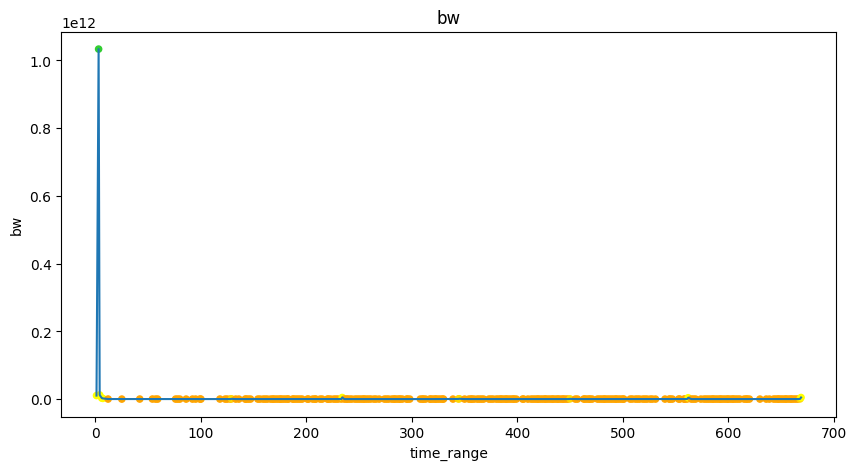

time: 710 ms (started: 2023-07-29 10:12:16 -07:00)


In [32]:
res.plot.bottleneck_timeline('bw')

<Axes: title={'center': 'iops'}, xlabel='time_range', ylabel='iops'>

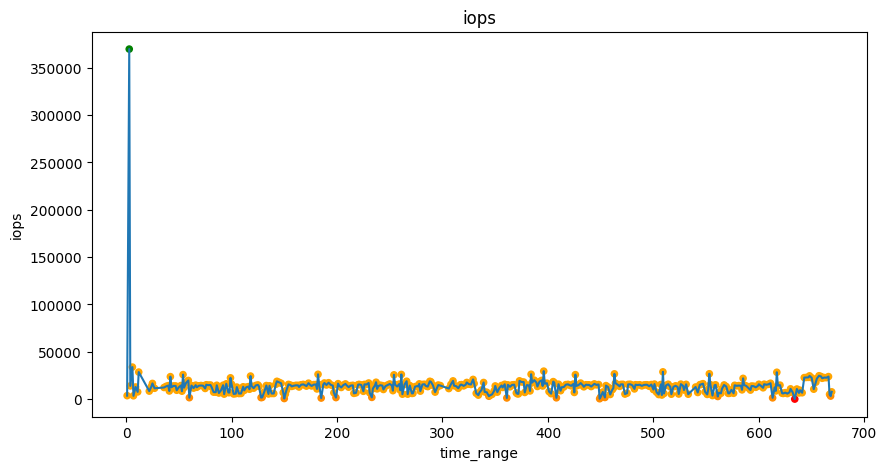

time: 760 ms (started: 2023-07-29 10:12:19 -07:00)


In [33]:
res.plot.bottleneck_timeline('iops')

In [7]:
main_view, views, bottlenecks = res

time: 837 µs (started: 2023-07-28 18:56:09 -07:00)


In [8]:
main_view.head(10)

duration_sum  \
trange file_name                                          proc_name                                          
1      /dev/null                                          app1#localhost#17#35184372411024        0.000003   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#17#35184372411024        0.001609   
3      /dev/null                                          app1#localhost#1#35184372411024         0.000003   
                                                          app1#localhost#10#35184372411024        0.000002   
                                                          app1#localhost#100#35184372411024       0.000003   
                                                          app1#localhost#1000#35184372411024      0.000003   
                                                          app1#localhost#1001#35184372411024      0.000003   
                                                          app1#localhost#1002#35184372411024      0.000003   
                                                          app1#localhost#1003#35184372411024      0.000003   
                                                          app1#localhost#1004#35184372411024      0.000002   

                                                                                              index_count  \
trange file_name                                          proc_name                                         
1      /dev/null                                          app1#localhost#17#35184372411024              1   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#17#35184372411024              5   
3      /dev/null                                          app1#localhost#1#35184372411024               1   
                                                          app1#localhost#10#35184372411024              1   
                                                          app1#localhost#100#35184372411024             1   
                                                          app1#localhost#1000#35184372411024            1   
                                                          app1#localhost#1001#35184372411024            1   
                                                          app1#localhost#1002#35184372411024            1   
                                                          app1#localhost#1003#35184372411024            1   
                                                          app1#localhost#1004#35184372411024            1   

                                                                                              size_min  \
trange file_name                                          proc_name                                      
1      /dev/null                                          app1#localhost#17#35184372411024           0   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#17#35184372411024    16777216   
3      /dev/null                                          app1#localhost#1#35184372411024            0   
                                                          app1#localhost#10#35184372411024           0   
                                                          app1#localhost#100#35184372411024          0   
                                                          app1#localhost#1000#35184372411024         0   
                                                          app1#localhost#1001#35184372411024         0   
                                                          app1#localhost#1002#35184372411024         0   
                                                          app1#localhost#1003#35184372411024         0   
                                                          app1#localhost#1004#35184372411024         0   

                                                                                              size_max  \
trange file_name                                          proc_name                  

time: 70.1 ms (started: 2023-07-28 18:56:09 -07:00)


In [9]:
views['duration_sum'][('trange',)].compute()

duration_sum  \
trange file_name                                          proc_name                                         
1      /dev/null                                          app1#localhost#17#35184372411024       0.000003   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#17#35184372411024       0.001609   
3      /dev/null                                          app1#localhost#1#35184372411024        0.000003   
                                                          app1#localhost#10#35184372411024       0.000002   
                                                          app1#localhost#100#35184372411024      0.000003   
...                                                                                                   ...   
669    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#840#35184372411024      0.000005   
                                                          app1#localhost#880#35184372411024      0.000005   
                                                          app1#localhost#920#35184372411024      0.000005   
                                                          app1#localhost#960#35184372411024      0.000005   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024        0.000226   

                                                                                             index_count  \
trange file_name                                          proc_name                                        
1      /dev/null                                          app1#localhost#17#35184372411024             1   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#17#35184372411024             5   
3      /dev/null                                          app1#localhost#1#35184372411024              1   
                                                          app1#localhost#10#35184372411024             1   
                                                          app1#localhost#100#35184372411024            1   
...                                                                                                  ...   
669    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#840#35184372411024            1   
                                                          app1#localhost#880#35184372411024            1   
                                                          app1#localhost#920#35184372411024            1   
                                                          app1#localhost#960#35184372411024            1   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024              2   

                                                                                             size_min  \
trange file_name                                          proc_name                                     
1      /dev/null                                          app1#localhost#17#35184372411024          0   
       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#17#35184372411024   16777216   
3      /dev/null                                          app1#localhost#1#35184372411024           0   
                                                          app1#localhost#10#35184372411024          0   
                                                          app1#localhost#100#35184372411024         0   
...                                                                                               ...   
669    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#840#35184372411024         0   
                                                          app1#localhost#880#35184372411024         0   
                                                          app1#localhost#920#35184372411024         0   
                                                          app1#localhost#960#35184372411024         0   
       /p/

time: 228 ms (started: 2023-07-28 18:56:10 -07:00)


In [10]:
bottlenecks['duration_sum'][('trange',)]['high_level_view'].compute()

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,seek_count,stat_count,bw,iops,intensity,att_perf,duration_pero,duration_perr,duration_score,duration_th
trange,,,,,,,,,,,,,,,,,,,,,
1,0.001612,6,0,16777216,16777216,0.001470,0.000000,0.000142,16777216,0,...,0,3,1.040899e+10,3722.546191,3.576279e-07,6.803647e+02,0.000735,0.000275,none,0.000
3,0.020756,7673,0,16777216,21441282048,0.001981,0.000000,0.020747,21441282048,0,...,1,3836,1.033036e+12,369683.347498,3.578611e-07,1.953726e+09,0.009469,0.003545,trivial,0.001
4,0.004128,58,0,16777216,50456557,0.001317,0.000201,0.002610,50331648,124909,...,1,42,1.222448e+10,14052.089326,1.149504e-06,1.357908e+07,0.001883,0.000705,trivial,0.001
5,2.191843,32,0,0,0,0.000000,0.000000,2.191843,0,0,...,0,0,0.000000e+00,14.599587,0.000000e+00,0.000000e+00,1.000000,0.374355,critical,0.900
6,0.011320,384,0,16777216,33560897,0.000000,0.006047,0.005273,0,33560897,...,2,270,2.964770e+09,33922.561157,1.144189e-05,8.985663e+07,0.005165,0.001933,trivial,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.001761,40,5530,97648,227631,0.000000,0.000411,0.001350,0,130255,...,5,14,1.292477e+08,22711.787246,1.757230e-04,7.917566e+06,0.000804,0.000301,none,0.000
666,0.001675,40,5530,97920,227903,0.000000,0.000377,0.001298,0,130255,...,5,14,1.360777e+08,23883.448781,1.755133e-04,8.079364e+06,0.000764,0.000286,none,0.000
667,0.027776,142,0,98192,104505,0.000000,0.000191,0.027585,0,6465,...,6,90,3.762461e+06,5112.382342,1.358787e-03,3.039387e+07,0.012672,0.004744,very low,0.010


time: 376 ms (started: 2023-07-28 18:56:11 -07:00)


In [11]:
dur_trange_bot_ll = bottlenecks['duration_sum'][('trange',)]['low_level_view'].query('duration_th > 0').compute()
dur_trange_bot_ll

duration_sum  \
trange proc_name                          file_name                                                          
3      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.020722   
4      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.002457   
5      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      1.970968   
       app1#localhost#1000#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      2.151723   
       app1#localhost#1040#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      1.952563   
...                                                                                                    ...   
668    app1#localhost#960#35184372411024  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.117417   
669    app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.008169   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.002690   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.002363   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.003665   

                                                                                              index_count  \
trange proc_name                          file_name                                                         
3      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            6   
4      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            8   
5      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
       app1#localhost#1000#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
       app1#localhost#1040#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
...                                                                                                   ...   
668    app1#localhost#960#35184372411024  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            4   
669    app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            4   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            2   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            2   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            3   

                                                                                              size_min  \
trange proc_name                          file_name                                                      
3      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
4      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      2055   
5      app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
       app1#localhost#1000#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
       app1#localhost#1040#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
...                                                                                                ...   
668    app1#localhost#960#35184372411024  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
669    app1#localhost#0#35184372411024    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...  13369344   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...   8454144   
                                          /p/gpfs1/iopp/temp/cm1r20.3.2846827/c

time: 274 ms (started: 2023-07-28 18:56:11 -07:00)


In [12]:
from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

    # app_name=('app_name', 'trange', 'file_name'),
    # file_dir=('file_dir', 'proc_name', 'trange'),
    # file_name=('file_name', 'proc_name', 'trange'),
    # file_regex=('file_regex', 'proc_name', 'trange'),
    # node_name=('node_name', 'trange', 'file_name'),
    # proc_name=('proc_name', 'trange', 'file_name'),
    # rank=('rank', 'trange', 'file_name'),
    # trange=('trange', 'proc_name', 'file_name'),

rules = dict(
    app_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_dir=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    file_regex=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    node_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    proc_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    rank=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    trange=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
)

rule_engine = RecorderRuleEngine(rules=rules)

rule_engine


time: 14.8 ms (started: 2023-07-28 19:00:35 -07:00)


In [13]:
%autoreload 2

characteristics = rule_engine.process_characteristics(view=main_view)
characteristics


{<Rule.CHAR_IO_TIME: 118>: RuleResult(data_dict=None, description='I/O Time', detail_list=['Read - 0.00 seconds (0.05%)', 'Write - 0.58 seconds (14.08%)', 'Metadata - 3.53 seconds (85.89%)'], reasons=None, rule=<Rule.CHAR_IO_TIME: 118>, value=4.1151000122494, value_fmt='4.12 seconds'),
 <Rule.CHAR_IO_COUNT: 111>: RuleResult(data_dict=None, description='I/O Ops', detail_list=['Read - 1,282 ops (4.67%)', 'Write - 2,303 ops (8.39%)', 'Metadata - 23,878 ops (86.95%)'], reasons=None, rule=<Rule.CHAR_IO_COUNT: 111>, value=27463, value_fmt='27,463 ops'),
 <Rule.CHAR_IO_SIZE: 116>: RuleResult(data_dict=None, description='I/O Size', detail_list=['Read - 20.03 GB (94.51%)', 'Write - 1.15 GB (5.41%)'], reasons=None, rule=<Rule.CHAR_IO_SIZE: 116>, value=22756918836, value_fmt='21.19 GB'),
 <Rule.CHAR_READ_XFER_SIZE: 132>: RuleResult(data_dict=None, description='Read Xfer', detail_list=['4-16 MB - 1,282 ops (100.00%)'], reasons=None, rule=<Rule.CHAR_READ_XFER_SIZE: 132>, value=(16777216, 16777216),

time: 210 ms (started: 2023-07-28 19:00:35 -07:00)


In [14]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.tree import Tree

# Create a new Table object from Rich library
table = Table(box=None, show_header=False)

# Add columns to the table for the key and value
table.add_column(style="cyan")
table.add_column()

# Add each key-value pair to the table as a row
for rule, result in characteristics.items():
    if result.detail_list is None:
        table.add_row(result.description, result.value_fmt)
    else:
        detail_tree = Tree(result.value_fmt)
        for detail in result.detail_list:
            detail_tree.add(detail)
        table.add_row(result.description, detail_tree)

# Create a Console object from Rich library
console = Console()

# Print the table with Rich formatting
console.print(Panel(table, title='Summary'))


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  I/O Time        4.12 seconds                                                                                   │
│                  ├── Read - 0.00 seconds (0.05%)                                                                │
│                  ├── Write - 0.58 seconds (14.08%)                                                              │
│                  └── Metadata - 3.53 seconds (85.89%)                                                           │
│  I/O Ops         27,463 ops                                                                                     │
│                  ├── Read - 1,282 ops (4.67%)                                                                   │
│                  ├── Write - 2,303 ops (8.39%)                                                                  │
│                  └── Metadata - 23,878 ops (86.95%)                                                             │
│  I/O Size        21.19 GB                                                                                       │
│                  ├── Read - 20.03 GB (94.51%)                                                                   │
│                  └── Write - 1.15 GB (5.41%)                                                                    │
│  Read Xfer       16 MB - 1,282 ops                                                                              │
│                  └── 4-16 MB - 1,282 ops (100.00%)                                                              │
│  Write Xfer      4 KB-16 MB - 2,254 ops                                                                         │
│                  ├── <4 KB - 397 ops (17.61%)                                                                   │
│                  ├── 4-16 KB - 1,092 ops (48.45%)                                                               │
│                  ├── 16-64 KB - 722 ops (32.03%)                                                                │
│                  ├── 64-256 KB - 1 ops (0.04%)                                                                  │
│                  └── 4-16 MB - 42 ops (1.86%)                                                                   │
│  Apps            1 apps                                                                                         │
│                  └── app1 - 4.12 s (100.00%) - 20.03/1.15 GB R/W (94.51/5.41%) - 27,463 ops (100.00%)           │
│  Nodes           1 nodes                                                                                        │
│                  └── localhost - 4.12 s (100.00%) - 20.03/1.15 GB R/W (94.51/5.41%) - 27,463 ops (100.00%)      │
│  Files           775 files                                                                                      │
│                  ├── Shared: 775 files (100.00%)                                                                │
│                  └── FPP: 0 files (0.00%)                                                                       │
│  Access Pattern  100.00% Sequential - 0.00% Random                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

time: 183 ms (started: 2023-07-28 19:00:37 -07:00)


In [15]:
%autoreload 2

processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.01)
processed_bottlenecks

{'duration_sum': {('trange',): {<Rule.BOTT_METADATA_ACCESS: 207>: {5: RuleResult(data_dict={'llc': {'duration_sum': 2.191842794418335, 'index_count': 32, 'size_min': 0, 'size_max': 0, 'size_sum': 0, 'read_time': 0.0, 'write_time': 0.0, 'metadata_time': 2.191842794418335, 'read_size': 0, 'write_size': 0, 'metadata_size': 0, 'read_count': 0, 'write_count': 0, 'metadata_count': 32, 'read_min': 0, 'read_max': 0, 'write_min': 0, 'write_max': 0, 'metadata_min': 0, 'metadata_max': 0, 'data_count': 0, 'data_size': 0, 'data_time': 0.0, 'sequential_time': 0.0, 'random_time': 0.0, 'sequential_size': 0, 'random_size': 0, 'sequential_count': 0, 'random_count': 0, 'close_time': 0.0, 'open_time': 2.191842794418335, 'seek_time': 0.0, 'stat_time': 0.0, 'close_count': 0, 'open_count': 32, 'seek_count': 0, 'stat_count': 0, 'bw': 0.0, 'iops': 14.599587197352841, 'intensity': 0.0, 'att_perf': 0.0, 'duration_pero': 1.0, 'duration_perr': 0.37435507603975887, 'duration_score': 'critical', 'duration_th': 0.9},

time: 6.94 s (started: 2023-07-28 19:00:38 -07:00)


In [ ]:
from rich.tree import Tree
from rich.console import Console

# create a tree object
tree = Tree("Bottlenecks")

for view_key, bottleneck_dict in processed_bottlenecks.items():
    branch_name = '_'.join(view_key) if isinstance(view_key, tuple) else view_key
    branch = tree.add(branch_name)
    for rule, rule_results in bottleneck_dict.items():
        subbranch = branch.add(rule.name)
        for bottleneck_key, result in rule_results.items():
            subbranch.add(result.description)


# create a console object and print the tree
console = Console()
console.print(tree)


In [18]:
from rich.table import Table
from rich.console import Console

# define the data as a list of tuples
data = [
    ("Root", None),
    ("Branch 1", "Root"),
    ("Leaf 1.1", "Branch 1"),
    ("Leaf 1.2", "Branch 1"),
    ("Branch 2", "Root"),
    ("Leaf 2.1", "Branch 2"),
    ("Leaf 2.2", "Branch 2"),
]

# create a table object and add columns
table = Table(show_header=False, box=None)
table.add_column(justify="left")
table.add_column(justify="left")

# add rows to the table
for row in data:
    if row[1] is None:
        table.add_row(row[0])
    else:
        table.add_row("", row[0])

# print the table
console = Console()
console.print(table)


Root           
       Branch 1 
       Leaf 1.1 
       Leaf 1.2 
       Branch 2 
       Leaf 2.1 
       Leaf 2.2

time: 7.39 ms (started: 2023-03-22 22:09:00 -07:00)


'/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat': 
RuleResult(rule=<Rule.METADATA_ACCESS_ISSUE: 21>, 
           
           description="'/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat' is 
           accessed by 32 process(es) during the 4th second(s) and spent 100.00% (2.19 seconds) of its I/O time on the 
           'open' operation(s).", 
        
    reasons=[RuleReason(description='Metadata time is 100.00% (2.19 seconds) of I/O time', value=1.0)])

- observation: '/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat' is 
           accessed by 32 process(es) during the 4th second(s)
- reason for bottleneck selection: has an I/O time of X which in Y% of overall I/O time of the workload.
- reason1: Overall % of I/O time is spent on metadata access, specifically % on 'open' ... and % on others. 

SMALL_IO_ACCESS

description = (
            f"'{ix}' is accessed by process(es) {join_with_and(processes_fmt)} "
            f"during the {join_with_and(values=trange_intervals)}th second(s) "
            f"with a transfer size smaller than 256KB ({max_xfer_size / 1024:.2f}KB)."
        )

- observation: '{ix}' is accessed by process(es) {join_with_and(processes_fmt)} during the {join_with_and(values=trange_intervals)}th second(s)
- reason for bottleneck: has an I/O time of X which in Y% of overall I/O time of the workload.
- reason1: Average I/O accesses on this file are smaller than 256KB, which is a small data access for GPFS. 
           Specifically ... (histogram or frequency/read or write)
- reason2: If metadata access > 50% ... 
TODO : check whether the file is on GPFS or not

In [15]:
files = ['/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat','/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat']
files

['/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat',
 '/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat']

time: 3.66 ms (started: 2023-03-16 11:49:16 -07:00)


In [16]:
all(['/gpfs' in f for f in files])

True

time: 3.63 ms (started: 2023-03-16 11:49:39 -07:00)


In [16]:
trange_hl_view = bottlenecks[('trange',)]['high_level_view'].compute()
trange_hl_view


,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,sequential_count,random_count,close_time,open_time,seek_time,stat_time,duration_pero,duration_perr,duration_score,duration_th
trange,,,,,,,,,,,,,,,,,,,,,
1,0.001612,6,0,16777216,16777216,0.001470,0.000000,0.000142,16777216,0,...,1,0,0.000009,0.000122,0.000000,0.000011,0.000392,0.000275,none,0.000
3,0.020756,7673,0,16777216,21441282048,0.001981,0.000000,0.020747,21441282048,0,...,1278,0,0.000012,0.020717,0.000003,0.000020,0.005044,0.003545,trivial,0.001
4,0.004128,58,0,16777216,50456557,0.001317,0.000201,0.002610,50331648,124909,...,5,0,0.000083,0.002489,0.000002,0.000027,0.001003,0.000705,trivial,0.001
5,2.191843,32,0,0,0,0.000000,0.000000,2.191843,0,0,...,0,0,0.000000,2.191843,0.000000,0.000000,0.532634,0.374355,high,0.500
6,0.011320,384,0,16777216,33560897,0.000000,0.006047,0.005273,0,33560897,...,6,0,0.000065,0.005128,0.000004,0.000057,0.002751,0.001933,trivial,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.001761,40,5530,97648,227631,0.000000,0.000411,0.001350,0,130255,...,6,0,0.000173,0.000645,0.000012,0.000054,0.000428,0.000301,none,0.000
666,0.001675,40,5530,97920,227903,0.000000,0.000377,0.001298,0,130255,...,6,0,0.000169,0.000627,0.000011,0.000059,0.000407,0.000286,none,0.000
667,0.027776,142,0,98192,104505,0.000000,0.000191,0.027585,0,6465,...,4,0,0.000051,0.027195,0.000011,0.000051,0.006750,0.004744,trivial,0.001


time: 305 ms (started: 2023-03-16 09:20:07 -07:00)


In [17]:
trange_hl_view['duration_th'].value_counts().sort_index()


0.000    292
0.001     89
0.010     11
0.500      1
Name: duration_th, dtype: int64

time: 4.34 ms (started: 2023-03-16 09:20:08 -07:00)


In [18]:
trange_hl_view.query('duration_th >= 0.01')


NameError: name 'trange_hl_view' is not defined

time: 15.9 ms (started: 2023-03-16 16:21:50 -07:00)


In [19]:
trange_ml_view = bottlenecks[('trange',)]['mid_level_view'].compute()
trange_ml_view


duration_sum  index_count  size_min  \
trange proc_name                                                                
1      app1#localhost#17#35184372411024       0.001612            6         0   
3      app1#localhost#0#35184372411024        0.020756           11         0   
       app1#localhost#1#35184372411024        0.000040            6         0   
       app1#localhost#10#35184372411024       0.000037            6         0   
       app1#localhost#100#35184372411024      0.000040            6         0   
...                                                ...          ...       ...   
669    app1#localhost#800#35184372411024      0.000044            4         0   
       app1#localhost#840#35184372411024      0.000044            4         0   
       app1#localhost#880#35184372411024      0.000043            4         0   
       app1#localhost#920#35184372411024      0.000042            4         0   
       app1#localhost#960#35184372411024      0.000047            4         0   

                                          size_max  size_sum  read_time  \
trange proc_name                                                          
1      app1#localhost#17#35184372411024   16777216  16777216   0.001470   
3      app1#localhost#0#35184372411024    16777216  16777216   0.000009   
       app1#localhost#1#35184372411024    16777216  16777216   0.000009   
       app1#localhost#10#35184372411024   16777216  16777216   0.000008   
       app1#localhost#100#35184372411024  16777216  16777216   0.000010   
...                                            ...       ...        ...   
669    app1#localhost#800#35184372411024         0         0   0.000000   
       app1#localhost#840#35184372411024         0         0   0.000000   
       app1#localhost#880#35184372411024         0         0   0.000000   
       app1#localhost#920#35184372411024         0         0   0.000000   
       app1#localhost#960#35184372411024         0         0   0.000000   

                                          write_time  metadata_time  \
trange proc_name                                                      
1      app1#localhost#17#35184372411024          0.0       0.000142   
3      app1#localhost#0#35184372411024           0.0       0.020747   
       app1#localhost#1#35184372411024           0.0       0.000031   
       app1#localhost#10#35184372411024          0.0       0.000029   
       app1#localhost#100#35184372411024         0.0       0.000030   
...                                              ...            ...   
669    app1#localhost#800#35184372411024         0.0       0.000044   
       app1#localhost#840#35184372411024         0.0       0.000044   
       app1#localhost#880#35184372411024         0.0       0.000043   
       app1#localhost#920#35184372411024         0.0       0.000042   
       app1#localhost#960#35184372411024         0.0       0.000047   

                                          read_size  write_size  ...  \
trange proc_name                                                 ...   
1      app1#localhost#17#35184372411024    16777216           0  ...   
3      app1#localhost#0#35184372411024     16777216           0  ...   
       app1#localhost#1#35184372411024     16777216           0  ...   
       app1#localhost#10#35184372411024    16777216           0  ...   
       app1#localhost#100#35184372411024   16777216           0  ...   
...                                             ...         ...  ...   
669    app1#localhost#800#35184372411024          0           0  ...   
       app1#localhost#840#35184372411024          0           0  ...   
       app1#localhost#880#35184372411024          0           0  ...   
       app1#localhost#920#35184372411024          0           0  ...   
       app1#localhost#960#35184372411024          0           0  ...   

                                          sequential_count  random_count  \
trange proc_name                                                           

time: 246 ms (started: 2023-03-16 09:20:08 -07:00)


In [20]:
trange_ml_view['duration_th'].value_counts().sort_index()


0.000    1839
0.001     128
0.010     198
0.250      13
0.500      19
Name: duration_th, dtype: int64

time: 4.08 ms (started: 2023-03-16 09:20:09 -07:00)


In [21]:
trange_ll_view = bottlenecks[('trange',)]['low_level_view'].compute()
trange_ll_view


duration_sum  \
trange proc_name                         file_name                                                          
1      app1#localhost#17#35184372411024  /dev/null                                               0.000003   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.001609   
3      app1#localhost#0#35184372411024   /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.000034   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.020722   
       app1#localhost#1#35184372411024   /dev/null                                               0.000003   
...                                                                                                   ...   
669    app1#localhost#920#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.000005   
       app1#localhost#960#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.000033   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.000005   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.000004   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...      0.000005   

                                                                                             index_count  \
trange proc_name                         file_name                                                         
1      app1#localhost#17#35184372411024  /dev/null                                                     1   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            5   
3      app1#localhost#0#35184372411024   /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            5   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            6   
       app1#localhost#1#35184372411024   /dev/null                                                     1   
...                                                                                                  ...   
669    app1#localhost#920#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
       app1#localhost#960#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...            1   

                                                                                             size_min  \
trange proc_name                         file_name                                                      
1      app1#localhost#17#35184372411024  /dev/null                                                  0   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...  16777216   
3      app1#localhost#0#35184372411024   /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...  16777216   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
       app1#localhost#1#35184372411024   /dev/null                                                  0   
...                                                                                               ...   
669    app1#localhost#920#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
       app1#localhost#960#35184372411024 /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
                                         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file...         0   
          

time: 234 ms (started: 2023-03-16 09:20:09 -07:00)


In [17]:
trange_ll_view['duration_th'].value_counts().sort_index()


0.000    6412
0.001      78
0.010     204
0.250      13
0.500      19
Name: duration_th, dtype: int64

time: 5.52 ms (started: 2023-03-15 13:02:46 -07:00)


In [19]:
proc_name_hl_view = bottlenecks[('proc_name',)]['high_level_view'].compute()
proc_name_hl_view


,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,sequential_count,random_count,close_time,open_time,seek_time,stat_time,duration_pero,duration_perr,duration_score,duration_th
proc_name,,,,,,,,,,,,,,,,,,,,,
app1#localhost#0#35184372411024,4.115100,15028,0,16777216,1298859572,0.001326,0.579398,3.534376,50331648,1230852944,...,2306,0,0.069000,3.275673,0.004011,0.022091,1.000000,0.042404,very high,0.75
app1#localhost#1000#35184372411024,3.061782,159,0,16777216,16777216,0.000011,0.000000,3.061771,16777216,0,...,1,0,0.000331,3.061133,0.000000,0.000307,0.744036,0.031550,high,0.50
app1#localhost#1038#35184372411024,0.000710,6,0,16777216,16777216,0.000506,0.000000,0.000204,16777216,0,...,1,0,0.000011,0.000181,0.000000,0.000012,0.000173,0.000007,none,0.00
app1#localhost#1040#35184372411024,3.071674,159,0,16777216,16777216,0.000009,0.000000,3.071665,16777216,0,...,1,0,0.000318,3.071038,0.000000,0.000309,0.746440,0.031652,high,0.50
app1#localhost#1068#35184372411024,0.000701,6,0,16777216,16777216,0.000516,0.000000,0.000185,16777216,0,...,1,0,0.000012,0.000161,0.000000,0.000012,0.000170,0.000007,none,0.00
app1#localhost#1080#35184372411024,2.932791,159,0,16777216,16777216,0.000009,0.000000,2.932782,16777216,0,...,1,0,0.000331,2.932137,0.000000,0.000313,0.712690,0.030221,high,0.50
app1#localhost#1111#35184372411024,0.002125,6,0,16777216,16777216,0.001981,0.000000,0.000144,16777216,0,...,1,0,0.000011,0.000123,0.000000,0.000010,0.000516,0.000022,none,0.00
app1#localhost#112#35184372411024,0.000855,6,0,16777216,16777216,0.000656,0.000000,0.000199,16777216,0,...,1,0,0.000009,0.000179,0.000000,0.000011,0.000208,0.000009,none,0.00
app1#localhost#1120#35184372411024,2.950001,164,0,16777216,16777216,0.000009,0.000000,2.949992,16777216,0,...,1,0,0.000316,2.949361,0.000000,0.000315,0.716872,0.030398,high,0.50


time: 298 ms (started: 2023-03-15 13:03:52 -07:00)


In [20]:
proc_name_hl_view['duration_th'].value_counts()

0.00    28
0.50    22
0.75    10
Name: duration_th, dtype: int64

time: 7.37 ms (started: 2023-03-15 13:04:09 -07:00)


In [22]:
proc_name_hl_view.query('duration_th >= 0.5')

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,sequential_count,random_count,close_time,open_time,seek_time,stat_time,duration_pero,duration_perr,duration_score,duration_th
proc_name,,,,,,,,,,,,,,,,,,,,,
app1#localhost#0#35184372411024,4.115100,15028,0,16777216,1298859572,0.001326,0.579398,3.534376,50331648,1230852944,...,2306,0,0.069000,3.275673,0.004011,0.022091,1.000000,0.042404,very high,0.75
app1#localhost#1000#35184372411024,3.061782,159,0,16777216,16777216,0.000011,0.000000,3.061771,16777216,0,...,1,0,0.000331,3.061133,0.000000,0.000307,0.744036,0.031550,high,0.50
app1#localhost#1040#35184372411024,3.071674,159,0,16777216,16777216,0.000009,0.000000,3.071665,16777216,0,...,1,0,0.000318,3.071038,0.000000,0.000309,0.746440,0.031652,high,0.50
app1#localhost#1080#35184372411024,2.932791,159,0,16777216,16777216,0.000009,0.000000,2.932782,16777216,0,...,1,0,0.000331,2.932137,0.000000,0.000313,0.712690,0.030221,high,0.50
app1#localhost#1120#35184372411024,2.950001,164,0,16777216,16777216,0.000009,0.000000,2.949992,16777216,0,...,1,0,0.000316,2.949361,0.000000,0.000315,0.716872,0.030398,high,0.50
app1#localhost#1160#35184372411024,2.781130,159,0,16777216,16777216,0.000018,0.000000,2.781112,16777216,0,...,1,0,0.000345,2.780460,0.000000,0.000307,0.675835,0.028658,high,0.50
app1#localhost#120#35184372411024,2.984170,158,0,16777216,16777216,0.000011,0.000000,2.984159,16777216,0,...,1,0,0.000373,2.983470,0.000000,0.000317,0.725176,0.030750,high,0.50
app1#localhost#1200#35184372411024,2.968496,160,0,16777216,16777216,0.000008,0.000000,2.968488,16777216,0,...,1,0,0.000285,2.967894,0.000000,0.000309,0.721367,0.030589,high,0.50
app1#localhost#1240#35184372411024,3.239430,158,0,16777216,16777216,0.000010,0.000000,3.239420,16777216,0,...,1,0,0.000309,3.238795,0.000000,0.000316,0.787206,0.033381,very high,0.75


time: 44.6 ms (started: 2023-03-15 13:04:46 -07:00)


In [22]:
file_name_hl_view = bottlenecks[('file_name',)]['high_level_view'].compute()
file_name_hl_view


,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,sequential_count,random_count,close_time,open_time,seek_time,stat_time,duration_pero,duration_perr,duration_score,duration_th
file_name,,,,,,,,,,,,,,,,,,,,,
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/LANDUSE.TBL,0.001437,5,16777216,16777216,16777216,0.001307,0.000000,0.000130,16777216,0,...,1,0,0.000008,0.000114,0.000000e+00,0.000008,0.000349,0.000185,none,0.000
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1_config.txt,0.002457,8,2055,2055,2055,0.000000,0.000072,0.002385,0,2055,...,1,0,0.000007,0.002360,1.900000e-06,0.000007,0.000597,0.000316,none,0.000
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat,2.191869,162,0,16777216,44564480,0.000000,0.006853,2.191869,0,44564480,...,3,0,0.000481,2.191843,0.000000e+00,0.000010,0.532640,0.281986,high,0.500
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_u.dat,0.003101,130,0,8454144,8454144,0.000000,0.002899,0.000854,0,8454144,...,1,0,0.000071,0.000840,0.000000e+00,0.000011,0.000754,0.000399,none,0.000
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_v.dat,0.002797,130,0,8454144,8454144,0.000000,0.002616,0.000726,0,8454144,...,1,0,0.000073,0.000715,0.000000e+00,0.000009,0.000680,0.000360,none,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1rst_000002_v.dat,0.002482,130,0,8454144,8454144,0.000000,0.002297,0.000526,0,8454144,...,1,0,0.000066,0.000514,0.000000e+00,0.000009,0.000603,0.000319,none,0.000
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1rst_000002_w.dat,0.003797,131,0,16777216,16908288,0.000000,0.003611,0.000729,0,16908288,...,2,0,0.000054,0.000715,0.000000e+00,0.000009,0.000923,0.000488,none,0.000
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1rst_000002_x.dat,0.000537,8,0,6112,6112,0.000000,0.000153,0.000384,0,6112,...,1,0,0.000073,0.000295,9.000000e-07,0.000009,0.000130,0.000069,none,0.000


time: 303 ms (started: 2023-03-16 09:20:21 -07:00)


In [23]:
file_name_hl_view['duration_th'].value_counts()

0.000    710
0.001     27
0.010     15
0.500      2
Name: duration_th, dtype: int64

time: 4.15 ms (started: 2023-03-16 09:20:22 -07:00)


In [24]:
file_name_hl_view.query('duration_th >= 0.5')

,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,sequential_count,random_count,close_time,open_time,seek_time,stat_time,duration_pero,duration_perr,duration_score,duration_th
file_name,,,,,,,,,,,,,,,,,,,,,
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat,2.191869,162,0,16777216,44564480,0.0,0.006853,2.191869,0,44564480,...,3,0,0.000481,2.191843,0.000000,0.000010,0.532640,0.281986,high,0.5
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_stats.ctl,2.220052,2528,0,5530,1996330,0.0,0.124729,2.095323,0,1996330,...,361,0,0.014551,1.984935,0.001064,0.006172,0.539489,0.285612,high,0.5


time: 29.5 ms (started: 2023-03-16 09:20:23 -07:00)


In [25]:
drop_cols = []
groupby = []
for col in file_name_hl_view.columns:
    if 'duration' in col or 'time' in col:
        # drop_cols.append(col)
        pass
    else:
        groupby.append(col)

repeated_behavior = file_name_hl_view \
    .query('duration_th > 0') \
    .drop(columns=drop_cols) \
    .reset_index() \
    .groupby(groupby) \
    .agg({
        'file_name': 'count',
        'duration_sum': 'mean',
        'open_time': 'mean',
    }) \
    .sort_values('file_name', ascending=False) \
    .query('file_name > 1')

repeated_behavior


file_name  \
index_count size_min size_max size_sum read_size write_size metadata_size read_count write_count metadata_count data_count data_size sequential_size random_size sequential_count random_count              
6           49340    49340    49340    0         49340      0             0          1           5              1          49340     49340           0           1                0                    10   
            47144    47144    47144    0         47144      0             0          1           5              1          47144     47144           0           1                0                     6   
163         0        16777216 44564480 0         44564480   0             0          3           160            3          44564480  44564480        0           3                0                     5   
135         0        16777216 84541440 0         84541440   0             0          6           129            6          84541440  84541440        0           6                0                     4   
130         0        8454144  8454144  0         8454144    0             0          1           129            1          8454144   8454144         0           1                0                     2   

                                                                                                                                                                                                duration_sum  \
index_count size_min size_max size_sum read_size write_size metadata_size read_count write_count metadata_count data_count data_size sequential_size random_size sequential_count random_count                 
6           49340    49340    49340    0         49340      0             0          1           5              1          49340     49340           0           1                0                 0.045141   
            47144    47144    47144    0         47144      0             0          1           5              1          47144     47144           0           1                0                 0.014540   
163         0        16777216 44564480 0         44564480   0             0          3           160            3          44564480  44564480        0           3                0                 0.166418   
135         0        16777216 84541440 0         84541440   0             0          6           129            6          84541440  84541440        0           6                0                 0.011092   
130         0        8454144  8454144  0         8454144    0             0          1           129            1          8454144   8454144         0           1                0                 0.022368   

                                                                                                                                                                                                open_time  
index_count size_min size_max size_sum read_size write_size metadata_size read_count write_count metadata_count data_count data_size sequential_size random_size sequential_count random_count             
6           49340    49340    49340    0         49340      0             0          1           5              1          49340     49340           0           1                0              0.044978  
            47144    47144    47144    0         47144      0             0          1           5              1          47144     47144           0           1                0              0.014423  
163         0        16777216 44564480 0         44564480   0             0          3           160            3          44564480  44564480        0           3                0              0.166391  
135         0        16777216 84541440 0         84541440   0             0          6           129            6          84541440  84541440        0           6                0              0.003854  
130         0        8454144  8454144  0         8454144    0             0

time: 36.4 ms (started: 2023-03-16 09:20:23 -07:00)


In [27]:
file_name_ml_view = bottlenecks[('file_name',)]['mid_level_view'].compute()
file_name_ml_view


duration_sum  \
file_name                                          proc_name                                          
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024         0.001437   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024         0.002457   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024         0.007453   
                                                   app1#localhost#1000#35184372411024      2.151749   
                                                   app1#localhost#1040#35184372411024      1.952589   
...                                                                                             ...   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#996#35184372411024       0.000038   
                                                   app1#localhost#997#35184372411024       0.000036   
                                                   app1#localhost#998#35184372411024       0.000037   
                                                   app1#localhost#999#35184372411024       0.000035   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024         0.020914   

                                                                                       index_count  \
file_name                                          proc_name                                         
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024               5   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024               8   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024               7   
                                                   app1#localhost#1000#35184372411024            5   
                                                   app1#localhost#1040#35184372411024            5   
...                                                                                            ...   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#996#35184372411024             5   
                                                   app1#localhost#997#35184372411024             5   
                                                   app1#localhost#998#35184372411024             5   
                                                   app1#localhost#999#35184372411024             5   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024               8   

                                                                                       size_min  \
file_name                                          proc_name                                      
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024     16777216   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024         2055   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024     11010048   
                                                   app1#localhost#1000#35184372411024         0   
                                                   app1#localhost#1040#35184372411024         0   
...                                                                                         ...   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#996#35184372411024   16777216   
                                                   app1#localhost#997#35184372411024   16777216   
                                                   app1#localhost#998#35184372411024   16777216   
                                                   app1#localhost#999#35184372411024   16777216   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024            0   

                                                                                       size_max  \
file_name                        

time: 278 ms (started: 2023-03-16 09:21:03 -07:00)


In [16]:
file_name_ll_view = bottlenecks[('file_name',)]['low_level_view'].compute()
file_name_ll_view


duration_sum  \
file_name                                          proc_name                          trange                 
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    4           0.001437   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    4           0.002457   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    6           0.005920   
                                                                                      7           0.001533   
                                                   app1#localhost#1000#35184372411024 4           0.000003   
...                                                                                                    ...   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#997#35184372411024  3           0.000036   
                                                   app1#localhost#998#35184372411024  3           0.000037   
                                                   app1#localhost#999#35184372411024  3           0.000035   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    3           0.020722   
                                                                                      4           0.000192   

                                                                                              index_count  \
file_name                                          proc_name                          trange                
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    4                 5   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    4                 8   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    6                 5   
                                                                                      7                 2   
                                                   app1#localhost#1000#35184372411024 4                 1   
...                                                                                                   ...   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#997#35184372411024  3                 5   
                                                   app1#localhost#998#35184372411024  3                 5   
                                                   app1#localhost#999#35184372411024  3                 5   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    3                 6   
                                                                                      4                 2   

                                                                                              size_min  \
file_name                                          proc_name                          trange             
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    4       16777216   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    4           2055   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411024    6       16777216   
                                                                                      7       11010048   
                                                   app1#localhost#1000#35184372411024 4              0   
...                                                                                                ...   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#997#35184372411024  3       16777216   
                                                   app1#localhost#998#35184372411024  3       16777216   
                                                   app1#localhost#999#35184372411024  3       16777216   
/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_file... app1#localhost#0#35184372411

time: 347 ms (started: 2023-03-16 12:17:15 -07:00)


In [19]:
file_name_ll_view.loc['/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/LANDUSE.TBL'].query('size_max > 1')

,,duration_sum,index_count,size_min,size_max,size_sum,read_time,write_time,metadata_time,read_size,write_size,...,sequential_count,random_count,close_time,open_time,seek_time,stat_time,duration_pero,duration_perr,duration_score,duration_th
proc_name,trange,,,,,,,,,,,,,,,,,,,,,
app1#localhost#0#35184372411024,4,0.001437,5,16777216,16777216,16777216,0.001307,0.0,0.00013,16777216,0,...,1,0,0.000008,0.000114,0.0,0.000008,0.000349,0.000015,none,0.0


time: 32.5 ms (started: 2023-03-16 12:17:25 -07:00)


In [18]:
for view_key, bottleneck in bottlenecks.items():
    for th in bottleneck.keys():
        print(view_key, th, len(bottleneck[th]))

('trange',) low_level_view 6726
('trange',) mid_level_view 2197
('trange',) high_level_view 393
('file_name',) low_level_view 5427
('file_name',) mid_level_view 3149
('file_name',) high_level_view 754
('proc_name',) low_level_view 4286
('proc_name',) mid_level_view 977
('proc_name',) high_level_view 60
('trange', 'file_name') low_level_view 5427
('trange', 'file_name') mid_level_view 3149
('trange', 'file_name') high_level_view 754
('trange', 'proc_name') low_level_view 4286
('trange', 'proc_name') mid_level_view 977
('trange', 'proc_name') high_level_view 60
('file_name', 'trange') low_level_view 5427
('file_name', 'trange') mid_level_view 2197
('file_name', 'trange') high_level_view 393
('file_name', 'proc_name') low_level_view 4207
('file_name', 'proc_name') mid_level_view 977
('file_name', 'proc_name') high_level_view 60
('proc_name', 'trange') low_level_view 4286
('proc_name', 'trange') mid_level_view 977
('proc_name', 'trange') high_level_view 393
('proc_name', 'file_name') low_l

In [15]:
recorder_analyzer.save_bottlenecks(log_dir=log_dir, bottlenecks=bottlenecks)


time: 4.22 s (started: 2023-03-12 17:31:20 -07:00)


In [16]:
!chmod g+r {log_dir}/bottlenecks/*
!ls -lh {log_dir}/bottlenecks

total 15M
-rw-r--r-- 1 izzet iopp 975K Mar 12 17:31 file_name.json
-rw-r--r-- 1 izzet iopp 1.1M Mar 12 17:31 file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 985K Mar 12 17:31 file_name_proc_name_trange.json
-rw-r--r-- 1 izzet iopp 985K Mar 12 17:31 file_name_trange.json
-rw-r--r-- 1 izzet iopp 1.1M Mar 12 17:31 file_name_trange_proc_name.json
-rw-r--r-- 1 izzet iopp 1.1M Mar 12 17:31 proc_name.json
-rw-r--r-- 1 izzet iopp 975K Mar 12 17:31 proc_name_file_name.json
-rw-r--r-- 1 izzet iopp 985K Mar 12 17:31 proc_name_file_name_trange.json
-rw-r--r-- 1 izzet iopp 985K Mar 12 17:31 proc_name_trange.json
-rw-r--r-- 1 izzet iopp 975K Mar 12 17:31 proc_name_trange_file_name.json
-rw-r--r-- 1 izzet iopp 985K Mar 12 17:31 trange.json
-rw-r--r-- 1 izzet iopp 975K Mar 12 17:31 trange_file_name.json
-rw-r--r-- 1 izzet iopp 1.1M Mar 12 17:31 trange_file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 1.1M Mar 12 17:31 trange_proc_name.json
-rw-r--r-- 1 izzet iopp 975K Mar 12 17:31 trange_proc_name_fil